In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Dense
from keras import Input
from keras.layers import Concatenate
from keras.utils import plot_model

In [2]:
# The data describe the characteristics of a house (surface, number of rooms...)
# and you should predict its price

# The metrics for the ranking will be based on the mean square error ('mse')

df_train = pd.read_csv("Train.csv")
df_train.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,77747,50,1,1,72,98938,8,10,2014,0,1,4829,4204,455,0,3,7786197.4
1,28459,52,0,0,4,50114,1,7,2012,1,1,3570,9363,318,0,6,2846923.2
2,34668,69,1,1,12,17366,8,7,2002,0,1,3476,7549,503,1,7,3475230.2
3,64335,4,0,0,83,65939,6,9,2020,1,0,7301,6989,802,0,1,6435779.0
4,22875,86,1,0,95,8661,5,7,1994,0,0,6394,2119,542,0,7,2295511.4


In [3]:
df_test = pd.read_csv("Test.csv")
df_test.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,92649,31,0,0,77,56098,10,8,1991,1,1,6811,2656,429,1,8,9271774.1
1,42485,1,0,0,40,23782,7,7,2017,0,1,974,9553,426,0,3,4251851.7
2,65867,37,0,0,92,67725,6,2,1994,1,1,3054,4650,998,1,10,6593211.4
3,2372,41,1,0,5,60320,1,1,2003,0,0,8041,7294,736,1,4,241014.3
4,60514,46,1,1,35,76413,2,1,2019,1,0,9227,737,340,0,8,6059360.9


In [4]:
# Separate input data/output data and store into numpy array

X_train = np.array(df_train.drop('price', axis=1))
y_train = np.array(df_train['price'])/10000

X_test = np.array(df_test.drop('price', axis=1))
y_test = np.array(df_test['price'])/10000

In [5]:
min, max = np.min(X_train, axis = 0), np.max(X_train, axis = 0)

X_train = (X_train - min)/(max - min)
X_test = (X_test - min)/(max - min)

In [6]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8000, 16) (8000,)
(1000, 16) (1000,)


In [7]:
# define model

def create_model() :

    # Input layer
    x0 = [Input(shape = (16, )) for _ in range (16)]

    # Hiddens layer
    x1 = [Dense(3, input_dim = 16, activation = "relu")(x) for x in x0]

    x2 = [Dense(3, activation = "relu")(x) for x in x1]

    x3 = [Dense(3, activation = "relu")(x) for x in x2]

    x3_temp = x3.copy()

    x4 = [Concatenate()([x3[i], x3[i + 1]]) for i in range (0, len(x3), 2)]

    x5 = [Dense(6, activation = "relu")(x) for x in x4]

    x6 = [Dense(5, activation = "relu")(x) for x in x5]

    x7 = [Concatenate()([x6[i], x6[i + 1]] + x3_temp[2*i : int(4*(i/2 + 1))]) for i in range (0, len(x6), 2)]

    x8 = [Dense(8, activation = "relu")(x) for x in x7]

    x9 = [Dense(8, activation = "relu")(x) for x in x8]

    x10 = [Concatenate()([x9[i], x9[i + 1]]) for i in range (0, len(x9), 2)]

    x11 = [Dense(16, activation = "relu")(x) for x in x10]

    x12 = [Dense(16, activation = "relu")(x) for x in x11]

    x13 = Concatenate()(x12)

    x14 = Dense(256, activation = "relu")(x13)

    # # Output layer
    x15 = Dense(1)(x14)

    # Create model
    model = Model(inputs = x0, outputs = x15)

    plot_model(model, show_shapes = True, to_file = "model_graph_test.png") ;

    model.compile(optimizer = 'rmsprop', loss = ["mse"], metrics = ["mse"])

    return model

In [17]:
model = create_model()

In [18]:
history = model.fit([X_train for _ in range (16)], y_train, epochs = 10, batch_size = 32)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 220905.8906 - mse: 220905.8906
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 51726.3320 - mse: 51726.3320
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3220.1372 - mse: 3220.1372
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1036.1897 - mse: 1036.1897
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 804.5542 - mse: 804.5542
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 692.3732 - mse: 692.3732
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 607.4807 - mse: 607.4807
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 550.5973 - mse: 550.5973
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 522.8035 - mse: 522.8035
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 473.4017 - mse: 473.4017


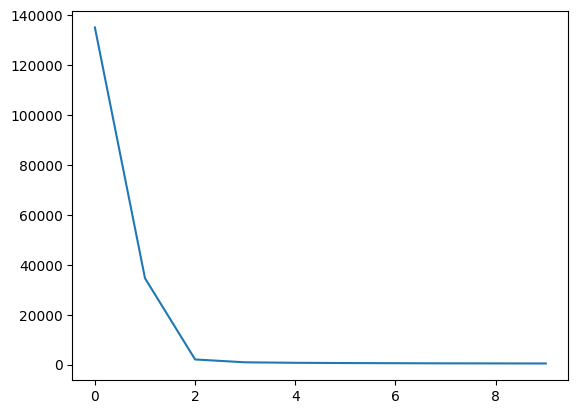

In [19]:
plt.plot(history.history["mse"])

In [11]:
# Import additionnal libraries

from sklearn.model_selection import KFold, train_test_split
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [12]:
validation_loss = []
history_list = []

In [13]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 0)

In [20]:
count = 0

for train_index, val_index in kfold.split(X_train, y_train) :
    model = create_model()

    stop = EarlyStopping(monitor = "val_mse", patience = 5, mode = "min")
    checkpoint = ModelCheckpoint("my_best_model" + str(count + 1) + ".keras", monitor = "val_mse", verbose = 0, save_best_only = True, mode = "min")
    callbacks = [stop, checkpoint]

    history = model.fit([X_train[train_index] for _ in range (16)], y_train[train_index], epochs = 100, callbacks = callbacks, batch_size = 32)
    history_list.append(history)
    validation_loss.append(model.evaluate([X_train[val_index] for _ in range (16)], y_train[val_index], return_dict = True, verbose = 0)["loss"])
    
    count += 1

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 220698.8594 - mse: 220698.8594
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 61846.3047 - mse: 61846.3047
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14759.5479 - mse: 14759.5479
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1800.3553 - mse: 1800.3553
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1115.8514 - mse: 1115.8514
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 918.8249 - mse: 918.8249
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 786.1041 - mse: 786.1041
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 724.5343 - mse: 724.5343
Epoch 9/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 647.1844 - mse: 647.1844
Epoch 10/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 675.5327 - mse: 675.5327
Epoch 11/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 577.3319 - mse: 577.3319
Epoch 12/100
200/200 ━━━━━━━━━━━━━

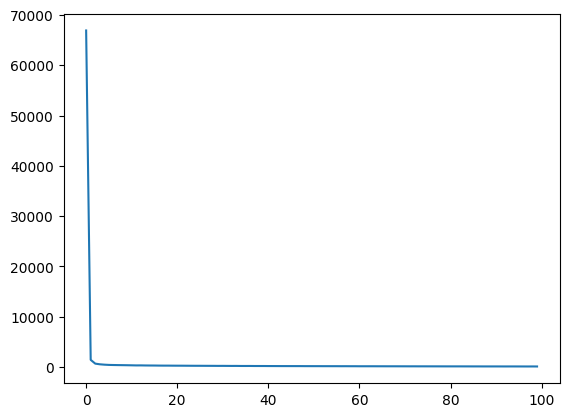

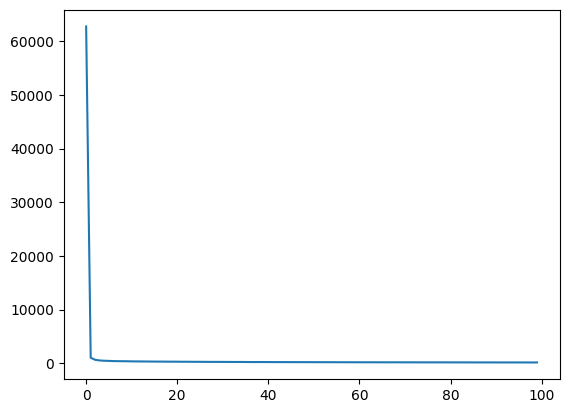

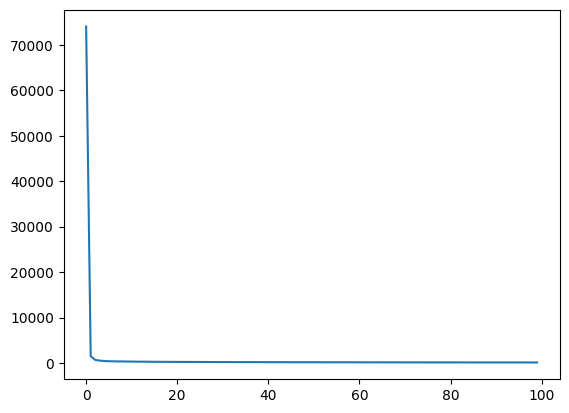

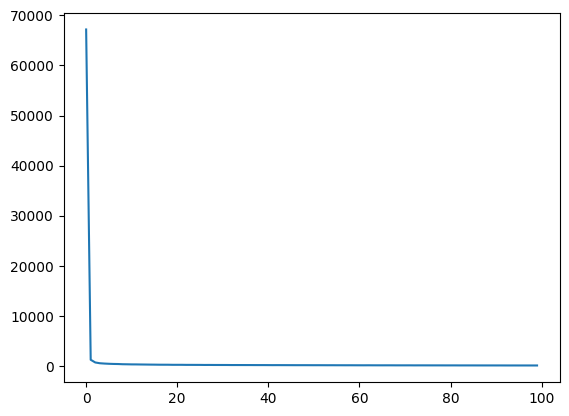

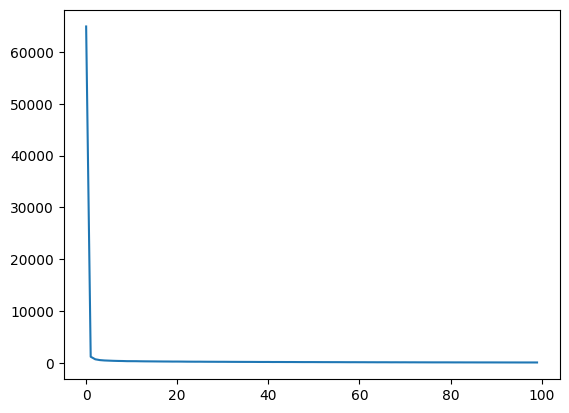

In [34]:
for hist in history_list :
    plt.plot(hist.history["loss"])
    plt.show()

In [35]:
print("average mse and standard deviation: ", np.mean(validation_loss), np.std(validation_loss))

average mse and standard deviation:  18.511379432678222 3.0914491052462574


In [36]:
all_model = []
for i in range (5) :
    all_model.append(load_model("my_best_model" + str(i) + ".keras"))

In [37]:
model_predict_moyenne = all_model[0].predict([X_test for _ in range (16)])

for i in range(1, 5) :
    model_predict_moyenne += all_model[i].predict([X_test for _ in range (16)])

model_predict_moyenne = np.round(model_predict_moyenne/10)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [38]:
print("Mean error: ", (np.sum(np.abs(model_predict_moyenne[:, 0] - y_test)) / len(y_test)))

mse :  9.110421876767502


In [39]:
np.array([model_predict_moyenne[:, 0], y_test])[:, :5]

array([[464.     , 213.     , 330.     ,  11.     , 303.     ],
       [927.17741, 425.18517, 659.32114,  24.10143, 605.93609]])

: 